## Import Libraries

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##  Configuration Variables

In [2]:
VAL_AND_TEST_SIZE = [.1, .2]
FILE_PATH = "Training Data - Classification of Patients with Abnormal Blood Pressure (N=2000)_27-Jul-2016.csv"

## Read Data

In [3]:
data = pd.read_csv(FILE_PATH)

In [4]:
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


## Gather Insights

In [5]:
data.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.0000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.5001,0.496922
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.0000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,1.0000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.0000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


At the first glance, I can see that:

    1) Count of the GPC is 1908 that means it contains 92 NaN values and I have to handle them.
    2) Looking at the mean std and percentiles, data distribution seems pretty consistent.

## Remove NaN value columns 

In [119]:
feature_list = []
labels_list = []
for gpc,loh, bpa in zip(data.Genetic_Pedigree_Coefficient, data.Level_of_Hemoglobin,data.Blood_Pressure_Abnormality):
    if not math.isnan(gpc):
        
        feature_list.append([loh, gpc,math.pow(loh,2),math.pow(gpc,2),loh+gpc])
        labels_list.append(bpa)
feature_list = np.array(feature_list)  

## Split data into train, validate and test data 

In [120]:
x_train, x_valtest, y_train, y_valtest =  train_test_split(feature_list, labels_list, test_size = \
                                                           sum(VAL_AND_TEST_SIZE))
x_val, x_test, y_val, y_test =  train_test_split(x_valtest, y_valtest, test_size = \
                                                 VAL_AND_TEST_SIZE[1]/sum(VAL_AND_TEST_SIZE))

## Plot the data

As it is a bi-variate analysis so I will use scatter plot to see the relation between Level of Haemoglobin and Genetic pedigree cofficient

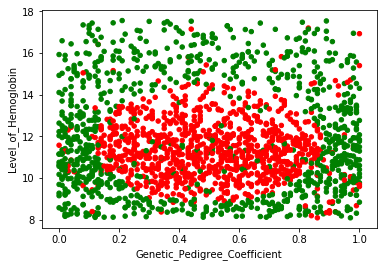

In [8]:
colors = np.where(data.Blood_Pressure_Abnormality==1,"g","r")
data.plot.scatter(x = "Genetic_Pedigree_Coefficient", y = "Level_of_Hemoglobin",c=colors)

Conclusions drwan from the above figure:

    1) Red dots represent normal blood pressure while green dots represent abnormal blood pressure.
    2) Extremely high or low levels of Haemoglobin and Genetic Pedigree cofficient will result in abnormal blood pressure 
    3) On this type of data it is pretty obvious that linear algorithms will not work so we cannot hope much from the Linear kernel SVM and Logistic regression.

## A custom made algorithm for this data

From the above scatter plot it can be seen that we need an elliptical decision boundary to classify between abnormal and normal blood pressure

The Equation of ellipse with center at c1,c2 is given as:

\begin{equation*}
\frac{(X-c1)^2}{a^2}+\frac{(Y-c2)^2}{b^2} = 1
\end{equation*}

A point will lie in the ellipse if:

\begin{equation*}
\frac{(X-c1)^2}{a^2}+\frac{(Y-c2)^2}{b^2} < 1
\end{equation*}

Steps followed to implement the above equation:

    1) X = GPC, Y = LoH
    2) c1,c2 -> trainable parameters. For intialization, they can be taken as the mean of the both columns.
    3) a and b -> trainable parameters. For initialization, they can be the difference of 50 pecentile and 75 percentile

I will tweak these parameters, until I am satisfied with the outputs.

In [9]:
def my_algorithm(X1, X2, y):
    predictions = np.where( ((((X2-.49)**2)/.13) +(((X1-11.7)**2)/7.9))<1, 0, 1)
    print("My algorithm Accuracy: {}".format(((predictions == y).sum()/len(predictions))*100))
    return predictions

Training:
My algorithm Accuracy: 90.2621722846442


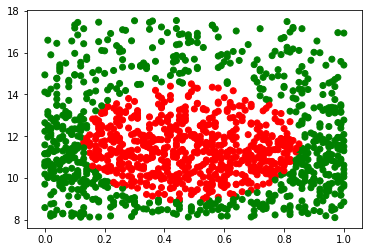

In [10]:
print("Training:")
predictions = my_algorithm(x_train[:,0], x_train[:, 1], y_train)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_train[:,1], y = x_train[:,0],c=colors)

Validation: 
My algorithm Accuracy: 90.0523560209424


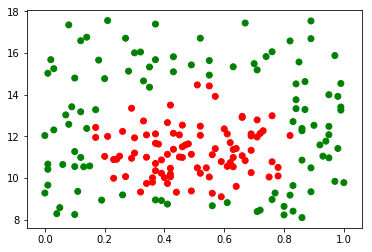

In [11]:
print("Validation: ")
predictions = my_algorithm(x_val[:,0], x_val[:, 1], y_val)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_val[:,1], y = x_val[:,0],c=colors)

Testing: 
My algorithm Accuracy: 92.40837696335078


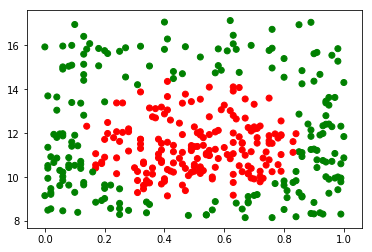

In [12]:
print("Testing: ")
predictions = my_algorithm(x_test[:,0], x_test[:, 1], y_test)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_test[:,1], y = x_test[:,0],c=colors)

I am getting 90.5% accuracy on the algorithm that I made.

## Logistic Regression

Logistic Regression Validation Accuracy: 89.00523560209425


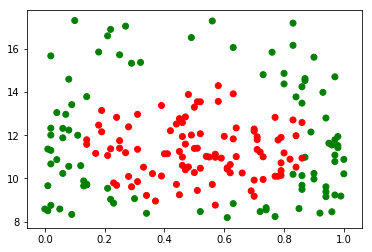

In [169]:
clf = LogisticRegression(dual=False,penalty="l1",tol=1e-10,intercept_scaling=4,)
clf.fit(X=x_train, y=y_train)
predictions = clf.predict(x_val)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_val[:,1], y = x_val[:,0],c=colors)
print("Logistic Regression Validation Accuracy: {}".format(((predictions == y_val).sum()/len(predictions))*100))

In [171]:
predictions = clf.predict(x_test)
confusion_matrix(predictions,y_test)

array([[187,  15],
       [ 10, 170]])

##  SVM

SVM Poly Classifier Validation Accuracy: 44.50261780104712


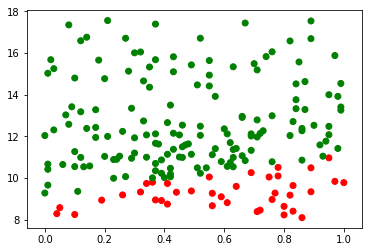

In [14]:
svm_clf = svm.LinearSVC()
svm_clf.fit(X=x_train, y=y_train)
predictions = svm_clf.predict(x_val)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_val[:,1], y = x_val[:,0],c=colors)
print("SVM Poly Classifier Validation Accuracy: {}".format(((predictions == y_val).sum()/len(predictions))*100))

As expected Linear SVC and Logistic Regression didn't work as this is a non-linear problem

## Non-Linear Approaches 

SVM with rbf and poly kernel

SVM RBF Kernel Classifier Validation Accuracy: 86.38743455497382


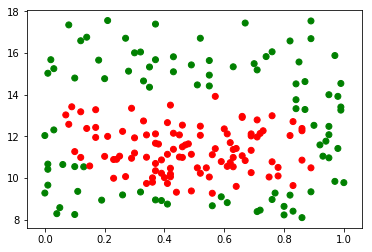

In [15]:
svm_clf = svm.SVC(kernel="rbf")
svm_clf.fit(X=x_train, y=y_train)
predictions = svm_clf.predict(x_val)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_val[:,1], y = x_val[:,0],c=colors)
print("SVM RBF Kernel Classifier Validation Accuracy: {}".format(((predictions == y_val).sum()/len(predictions))*100))

SVM Poly Kernel Classifier Validation Accuracy: 78.01047120418848


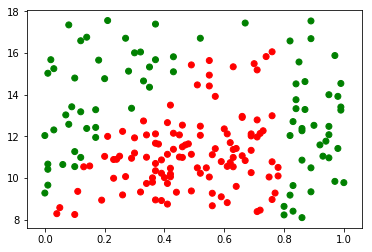

In [16]:
svm_clf = svm.SVC(kernel="poly")
svm_clf.fit(X=x_train, y=y_train)
predictions = svm_clf.predict(x_val)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_val[:,1], y = x_val[:,0],c=colors)
print("SVM Poly Kernel Classifier Validation Accuracy: {}".format(((predictions == y_val).sum()/len(predictions))*100))

SVM Poly kernel Classifier Test Accuracy: 75.39267015706807


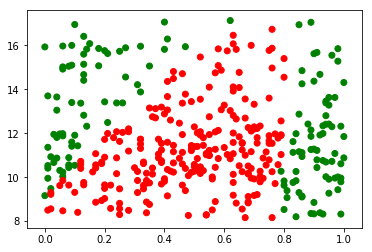

In [17]:
predictions = svm_clf.predict(x_test)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_test[:,1], y = x_test[:,0],c=colors)
print("SVM Poly kernel Classifier Test Accuracy: {}".format(((predictions == y_test).sum()/len(predictions))*100))

Insights:

* RBF kernel performs better than poly kernel because RBF is a squared exponential is nore flexible than N degree polynomial
* Both of these algorithms they take a large amount of time to fit the data.

## Decision Trees

Decision Tree Training Classifier Accuracy: 99.8501872659176


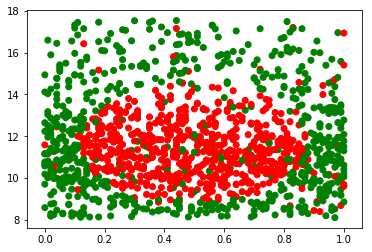

In [18]:
dt_clf = DecisionTreeClassifier(criterion="entropy")
dt_clf.fit(X=x_train, y=y_train)
predictions = dt_clf.predict(x_train)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_train[:,1], y = x_train[:,0],c=colors)
print("Decision Tree Training Classifier Accuracy: {}".format(((predictions == y_train).sum()/len(predictions))*100))

Decision Tree Validation Classifier Accuracy: 82.19895287958116


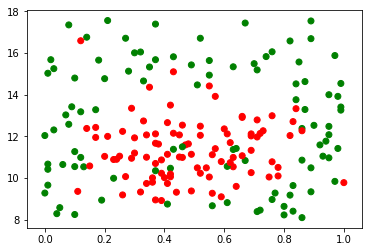

In [19]:
predictions = dt_clf.predict(x_val)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_val[:,1], y = x_val[:,0],c=colors)
print("Decision Tree Validation Classifier Accuracy: {}".format(((predictions == y_val).sum()/len(predictions))*100))

Decision Tree Classifier Test Accuracy: 87.17277486910994


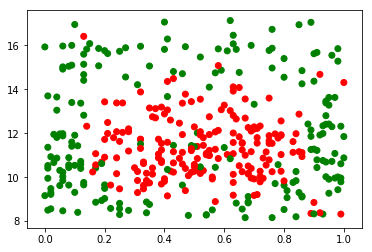

In [20]:
predictions = dt_clf.predict(x_test)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_test[:,1], y = x_test[:,0],c=colors)
print("Decision Tree Classifier Test Accuracy: {}".format(((predictions == y_test).sum()/len(predictions))*100))

## Naive Bayes 

Naive Bayes Classifier Training Accuracy: 86.06741573033709


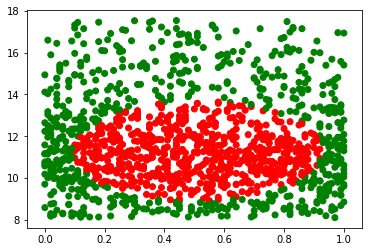

In [21]:

nb_clf = GaussianNB()
nb_clf.fit(X=x_train, y=y_train)
predictions = nb_clf.predict(x_train)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_train[:,1], y = x_train[:,0],c=colors)
print("Naive Bayes Classifier Training Accuracy: {}".format(((predictions == y_train).sum()/len(predictions))*100))

Naive Bayes Classifier Validation Accuracy: 89.00523560209425


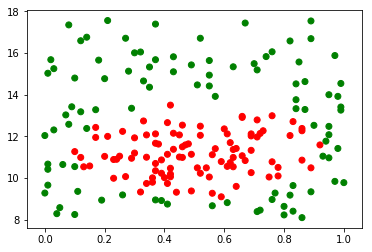

In [22]:
predictions = nb_clf.predict(x_val)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_val[:,1], y = x_val[:,0],c=colors)
print("Naive Bayes Classifier Validation Accuracy: {}".format(((predictions == y_val).sum()/len(predictions))*100))

Naive Bayes Classifier Test Accuracy: 87.17277486910994


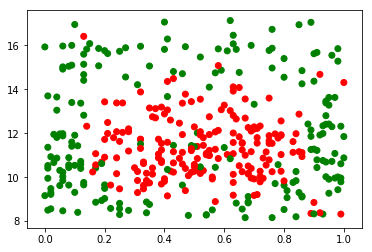

In [23]:
predictions = dt_clf.predict(x_test)
colors = np.where(predictions==1,"g","r")
plt.scatter(x = x_test[:,1], y = x_test[:,0],c=colors)
print("Naive Bayes Classifier Test Accuracy: {}".format(((predictions == y_test).sum()/len(predictions))*100))

Only Naive bayes and Decision Trees are giving the desired pattern of the output. Hence they are the right one to use.
Insights:
    
* Decision Tree with criterion as entropy is giving more accuracy than Naive Bayes.
* However, Naive Bayes is more generalized. Decision tree is overfitting some data which lies outside the ellipse but Naive Bayes does not.

__So according to me, Gaussian NB as the best-suited ML algorithm for this problem.__

## Neural Networks 

In [123]:
# Convert labels into onehot encoding
onehot_ytrain = to_categorical(y_train)
onehot_yval = to_categorical(y_val)
onehot_ytest = to_categorical(y_test)

Developed a model using Keras using 3 dense layers

In [127]:
model = Sequential()
model.add(Dense(20, input_shape = [5],  kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(2, activation='softmax'))

# Print the model
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_23 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 4         
Total params: 4,265
Trainable params: 4,265
Non-trainable params: 0
_________________________________________________________________


In [128]:
# Train the model
hist = model.fit(x_train, np.array(onehot_ytrain), batch_size=128, epochs=10000, validation_data=[x_val, np.array(onehot_yval)])

Train on 1335 samples, validate on 191 samples
Epoch 1/10000
1335/1335 [==============================] - 0s 235us/step - loss: 0.6930 - acc: 0.5206 - val_loss: 0.6939 - val_acc: 0.4607
Epoch 2/10000
1335/1335 [==============================] - 0s 23us/step - loss: 0.6922 - acc: 0.5124 - val_loss: 0.6943 - val_acc: 0.4607
Epoch 3/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.6914 - acc: 0.5124 - val_loss: 0.6957 - val_acc: 0.4607
Epoch 4/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.6899 - acc: 0.5124 - val_loss: 0.6973 - val_acc: 0.4607
Epoch 5/10000
1335/1335 [==============================] - 0s 37us/step - loss: 0.6896 - acc: 0.5124 - val_loss: 0.7008 - val_acc: 0.4607
Epoch 6/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.6893 - acc: 0.5124 - val_loss: 0.6974 - val_acc: 0.4607
Epoch 7/10000
1335/1335 [==============================] - 0s 34us/step - loss: 0.6880 - acc: 0.5124 - val_loss: 0.6979 - va

Epoch 118/10000
1335/1335 [==============================] - 0s 42us/step - loss: 0.5530 - acc: 0.7116 - val_loss: 0.5832 - val_acc: 0.7068
Epoch 119/10000
1335/1335 [==============================] - 0s 32us/step - loss: 0.5519 - acc: 0.7139 - val_loss: 0.5813 - val_acc: 0.7016
Epoch 120/10000
1335/1335 [==============================] - 0s 24us/step - loss: 0.5527 - acc: 0.7184 - val_loss: 0.5808 - val_acc: 0.7068
Epoch 121/10000
1335/1335 [==============================] - 0s 30us/step - loss: 0.5514 - acc: 0.7154 - val_loss: 0.5828 - val_acc: 0.7068
Epoch 122/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.5511 - acc: 0.7161 - val_loss: 0.5820 - val_acc: 0.7120
Epoch 123/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.5546 - acc: 0.7124 - val_loss: 0.5853 - val_acc: 0.7120
Epoch 124/10000
1335/1335 [==============================] - 0s 26us/step - loss: 0.5521 - acc: 0.7184 - val_loss: 0.5800 - val_acc: 0.7068
Epoch 125/10000
1335

1335/1335 [==============================] - 0s 19us/step - loss: 0.4935 - acc: 0.7760 - val_loss: 0.5357 - val_acc: 0.7853
Epoch 235/10000
1335/1335 [==============================] - 0s 29us/step - loss: 0.4942 - acc: 0.7775 - val_loss: 0.5452 - val_acc: 0.7801
Epoch 236/10000
1335/1335 [==============================] - 0s 34us/step - loss: 0.4953 - acc: 0.7745 - val_loss: 0.5420 - val_acc: 0.7801
Epoch 237/10000
1335/1335 [==============================] - 0s 36us/step - loss: 0.4988 - acc: 0.7738 - val_loss: 0.5279 - val_acc: 0.7958
Epoch 238/10000
1335/1335 [==============================] - 0s 51us/step - loss: 0.4957 - acc: 0.7813 - val_loss: 0.5272 - val_acc: 0.7853
Epoch 239/10000
1335/1335 [==============================] - 0s 32us/step - loss: 0.4910 - acc: 0.7790 - val_loss: 0.5341 - val_acc: 0.8010
Epoch 240/10000
1335/1335 [==============================] - 0s 32us/step - loss: 0.4905 - acc: 0.7798 - val_loss: 0.5305 - val_acc: 0.7853
Epoch 241/10000
1335/1335 [=========

1335/1335 [==============================] - 0s 39us/step - loss: 0.3785 - acc: 0.8667 - val_loss: 0.5100 - val_acc: 0.8429
Epoch 351/10000
1335/1335 [==============================] - 0s 19us/step - loss: 0.3796 - acc: 0.8562 - val_loss: 0.4713 - val_acc: 0.8482
Epoch 352/10000
1335/1335 [==============================] - 0s 54us/step - loss: 0.4017 - acc: 0.8345 - val_loss: 0.4417 - val_acc: 0.8429
Epoch 353/10000
1335/1335 [==============================] - 0s 34us/step - loss: 0.3823 - acc: 0.8637 - val_loss: 0.4828 - val_acc: 0.8534
Epoch 354/10000
1335/1335 [==============================] - 0s 24us/step - loss: 0.3701 - acc: 0.8824 - val_loss: 0.4348 - val_acc: 0.8586
Epoch 355/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.3694 - acc: 0.8801 - val_loss: 0.4522 - val_acc: 0.8743
Epoch 356/10000
1335/1335 [==============================] - 0s 42us/step - loss: 0.3665 - acc: 0.8846 - val_loss: 0.4409 - val_acc: 0.8796
Epoch 357/10000
1335/1335 [=========

1335/1335 [==============================] - 0s 28us/step - loss: 0.3136 - acc: 0.9041 - val_loss: 0.4111 - val_acc: 0.8953
Epoch 467/10000
1335/1335 [==============================] - 0s 42us/step - loss: 0.3404 - acc: 0.8824 - val_loss: 0.6036 - val_acc: 0.8010
Epoch 468/10000
1335/1335 [==============================] - 0s 43us/step - loss: 0.3529 - acc: 0.8629 - val_loss: 0.5347 - val_acc: 0.8115
Epoch 469/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.3221 - acc: 0.8981 - val_loss: 0.4729 - val_acc: 0.8534
Epoch 470/10000
1335/1335 [==============================] - 0s 45us/step - loss: 0.3288 - acc: 0.8846 - val_loss: 0.4111 - val_acc: 0.9005
Epoch 471/10000
1335/1335 [==============================] - 0s 18us/step - loss: 0.3223 - acc: 0.8959 - val_loss: 0.4485 - val_acc: 0.8534
Epoch 472/10000
1335/1335 [==============================] - 0s 29us/step - loss: 0.3243 - acc: 0.8854 - val_loss: 0.4439 - val_acc: 0.8482
Epoch 473/10000
1335/1335 [=========

1335/1335 [==============================] - 0s 31us/step - loss: 0.3135 - acc: 0.8936 - val_loss: 0.4386 - val_acc: 0.8901
Epoch 583/10000
1335/1335 [==============================] - 0s 29us/step - loss: 0.3143 - acc: 0.8914 - val_loss: 0.4116 - val_acc: 0.8953
Epoch 584/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.3036 - acc: 0.9011 - val_loss: 0.4061 - val_acc: 0.8796
Epoch 585/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.3119 - acc: 0.8929 - val_loss: 0.4130 - val_acc: 0.8901
Epoch 586/10000
1335/1335 [==============================] - 0s 25us/step - loss: 0.3031 - acc: 0.8996 - val_loss: 0.4505 - val_acc: 0.8796
Epoch 587/10000
1335/1335 [==============================] - 0s 16us/step - loss: 0.2986 - acc: 0.9079 - val_loss: 0.4892 - val_acc: 0.8429
Epoch 588/10000
1335/1335 [==============================] - 0s 28us/step - loss: 0.3084 - acc: 0.8996 - val_loss: 0.5199 - val_acc: 0.8325
Epoch 589/10000
1335/1335 [=========

1335/1335 [==============================] - 0s 44us/step - loss: 0.2945 - acc: 0.9064 - val_loss: 0.4129 - val_acc: 0.8953
Epoch 699/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.3104 - acc: 0.8891 - val_loss: 0.4090 - val_acc: 0.8953
Epoch 700/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.3027 - acc: 0.8981 - val_loss: 0.4190 - val_acc: 0.8848
Epoch 701/10000
1335/1335 [==============================] - 0s 31us/step - loss: 0.2899 - acc: 0.9116 - val_loss: 0.4127 - val_acc: 0.8901
Epoch 702/10000
1335/1335 [==============================] - 0s 36us/step - loss: 0.2965 - acc: 0.9026 - val_loss: 0.3981 - val_acc: 0.8796
Epoch 703/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.3130 - acc: 0.8876 - val_loss: 0.4117 - val_acc: 0.8848
Epoch 704/10000
1335/1335 [==============================] - 0s 26us/step - loss: 0.3031 - acc: 0.8951 - val_loss: 0.4238 - val_acc: 0.8796
Epoch 705/10000
1335/1335 [=========

1335/1335 [==============================] - 0s 39us/step - loss: 0.2942 - acc: 0.9056 - val_loss: 0.4712 - val_acc: 0.8639
Epoch 815/10000
1335/1335 [==============================] - 0s 39us/step - loss: 0.2899 - acc: 0.9064 - val_loss: 0.4047 - val_acc: 0.8796
Epoch 816/10000
1335/1335 [==============================] - 0s 34us/step - loss: 0.2943 - acc: 0.9071 - val_loss: 0.4370 - val_acc: 0.8901
Epoch 817/10000
1335/1335 [==============================] - 0s 70us/step - loss: 0.3064 - acc: 0.8846 - val_loss: 0.5646 - val_acc: 0.8115
Epoch 818/10000
1335/1335 [==============================] - 0s 49us/step - loss: 0.3045 - acc: 0.8966 - val_loss: 0.4894 - val_acc: 0.8482
Epoch 819/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.3176 - acc: 0.8884 - val_loss: 0.4084 - val_acc: 0.8586
Epoch 820/10000
1335/1335 [==============================] - 0s 26us/step - loss: 0.3156 - acc: 0.8869 - val_loss: 0.4245 - val_acc: 0.8639
Epoch 821/10000
1335/1335 [=========

1335/1335 [==============================] - 0s 41us/step - loss: 0.2978 - acc: 0.8951 - val_loss: 0.4207 - val_acc: 0.8901
Epoch 931/10000
1335/1335 [==============================] - 0s 34us/step - loss: 0.2870 - acc: 0.9064 - val_loss: 0.4524 - val_acc: 0.8586
Epoch 932/10000
1335/1335 [==============================] - 0s 30us/step - loss: 0.2985 - acc: 0.8951 - val_loss: 0.4919 - val_acc: 0.8482
Epoch 933/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.3106 - acc: 0.8891 - val_loss: 0.4153 - val_acc: 0.8848
Epoch 934/10000
1335/1335 [==============================] - 0s 29us/step - loss: 0.3023 - acc: 0.8914 - val_loss: 0.4102 - val_acc: 0.8743
Epoch 935/10000
1335/1335 [==============================] - 0s 34us/step - loss: 0.3049 - acc: 0.8884 - val_loss: 0.4046 - val_acc: 0.8796
Epoch 936/10000
1335/1335 [==============================] - 0s 17us/step - loss: 0.3052 - acc: 0.8929 - val_loss: 0.4169 - val_acc: 0.8796
Epoch 937/10000
1335/1335 [=========

1335/1335 [==============================] - 0s 42us/step - loss: 0.2883 - acc: 0.9034 - val_loss: 0.4601 - val_acc: 0.8639
Epoch 1047/10000
1335/1335 [==============================] - 0s 25us/step - loss: 0.2923 - acc: 0.8996 - val_loss: 0.4325 - val_acc: 0.8691
Epoch 1048/10000
1335/1335 [==============================] - 0s 23us/step - loss: 0.2888 - acc: 0.9011 - val_loss: 0.4418 - val_acc: 0.8691
Epoch 1049/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.2985 - acc: 0.9049 - val_loss: 0.4858 - val_acc: 0.8272
Epoch 1050/10000
1335/1335 [==============================] - 0s 67us/step - loss: 0.2978 - acc: 0.8929 - val_loss: 0.4095 - val_acc: 0.8848
Epoch 1051/10000
1335/1335 [==============================] - 0s 28us/step - loss: 0.2833 - acc: 0.9019 - val_loss: 0.4334 - val_acc: 0.8743
Epoch 1052/10000
1335/1335 [==============================] - 0s 41us/step - loss: 0.2839 - acc: 0.9079 - val_loss: 0.4149 - val_acc: 0.8848
Epoch 1053/10000
1335/1335 [==

1335/1335 [==============================] - 0s 34us/step - loss: 0.2931 - acc: 0.8966 - val_loss: 0.4018 - val_acc: 0.9005
Epoch 1163/10000
1335/1335 [==============================] - 0s 40us/step - loss: 0.3008 - acc: 0.8929 - val_loss: 0.4169 - val_acc: 0.8901
Epoch 1164/10000
1335/1335 [==============================] - 0s 65us/step - loss: 0.2875 - acc: 0.9064 - val_loss: 0.4204 - val_acc: 0.8848
Epoch 1165/10000
1335/1335 [==============================] - 0s 70us/step - loss: 0.2907 - acc: 0.9004 - val_loss: 0.4138 - val_acc: 0.8848
Epoch 1166/10000
1335/1335 [==============================] - 0s 29us/step - loss: 0.2827 - acc: 0.9079 - val_loss: 0.4422 - val_acc: 0.8743
Epoch 1167/10000
1335/1335 [==============================] - 0s 52us/step - loss: 0.3146 - acc: 0.8891 - val_loss: 0.4604 - val_acc: 0.8534
Epoch 1168/10000
1335/1335 [==============================] - 0s 37us/step - loss: 0.3135 - acc: 0.8764 - val_loss: 0.6200 - val_acc: 0.8010
Epoch 1169/10000
1335/1335 [==

1335/1335 [==============================] - 0s 45us/step - loss: 0.2865 - acc: 0.9019 - val_loss: 0.4725 - val_acc: 0.8482
Epoch 1279/10000
1335/1335 [==============================] - 0s 49us/step - loss: 0.2850 - acc: 0.8966 - val_loss: 0.4603 - val_acc: 0.8639
Epoch 1280/10000
1335/1335 [==============================] - 0s 46us/step - loss: 0.2775 - acc: 0.9109 - val_loss: 0.4191 - val_acc: 0.8901
Epoch 1281/10000
1335/1335 [==============================] - 0s 32us/step - loss: 0.2799 - acc: 0.9056 - val_loss: 0.4353 - val_acc: 0.8901
Epoch 1282/10000
1335/1335 [==============================] - 0s 23us/step - loss: 0.2824 - acc: 0.9049 - val_loss: 0.4239 - val_acc: 0.8743
Epoch 1283/10000
1335/1335 [==============================] - 0s 51us/step - loss: 0.2842 - acc: 0.9056 - val_loss: 0.4729 - val_acc: 0.8639
Epoch 1284/10000
1335/1335 [==============================] - 0s 51us/step - loss: 0.2819 - acc: 0.9011 - val_loss: 0.5581 - val_acc: 0.8115
Epoch 1285/10000
1335/1335 [==

1335/1335 [==============================] - 0s 29us/step - loss: 0.2816 - acc: 0.9034 - val_loss: 0.4266 - val_acc: 0.9005
Epoch 1395/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.2829 - acc: 0.9071 - val_loss: 0.4259 - val_acc: 0.8848
Epoch 1396/10000
1335/1335 [==============================] - 0s 31us/step - loss: 0.2958 - acc: 0.9004 - val_loss: 0.5620 - val_acc: 0.8325
Epoch 1397/10000
1335/1335 [==============================] - 0s 36us/step - loss: 0.3150 - acc: 0.8831 - val_loss: 0.4537 - val_acc: 0.8534
Epoch 1398/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.2827 - acc: 0.9041 - val_loss: 0.4565 - val_acc: 0.8796
Epoch 1399/10000
1335/1335 [==============================] - 0s 65us/step - loss: 0.2752 - acc: 0.9079 - val_loss: 0.4124 - val_acc: 0.8901
Epoch 1400/10000
1335/1335 [==============================] - 0s 29us/step - loss: 0.2769 - acc: 0.9116 - val_loss: 0.4236 - val_acc: 0.8901
Epoch 1401/10000
1335/1335 [==

1335/1335 [==============================] - 0s 21us/step - loss: 0.2731 - acc: 0.9086 - val_loss: 0.4427 - val_acc: 0.8901
Epoch 1511/10000
1335/1335 [==============================] - 0s 24us/step - loss: 0.2779 - acc: 0.9139 - val_loss: 0.4502 - val_acc: 0.8796
Epoch 1512/10000
1335/1335 [==============================] - 0s 39us/step - loss: 0.2853 - acc: 0.9071 - val_loss: 0.4112 - val_acc: 0.8901
Epoch 1513/10000
1335/1335 [==============================] - 0s 51us/step - loss: 0.2880 - acc: 0.8974 - val_loss: 0.4305 - val_acc: 0.8901
Epoch 1514/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.2800 - acc: 0.9109 - val_loss: 0.4435 - val_acc: 0.8796
Epoch 1515/10000
1335/1335 [==============================] - 0s 41us/step - loss: 0.2793 - acc: 0.8996 - val_loss: 0.4415 - val_acc: 0.8796
Epoch 1516/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.3111 - acc: 0.8906 - val_loss: 0.3893 - val_acc: 0.8848
Epoch 1517/10000
1335/1335 [==

Epoch 1568/10000
1335/1335 [==============================] - 0s 30us/step - loss: 0.2745 - acc: 0.9116 - val_loss: 0.4885 - val_acc: 0.8691
Epoch 1569/10000
1335/1335 [==============================] - 0s 37us/step - loss: 0.2856 - acc: 0.9026 - val_loss: 0.4507 - val_acc: 0.8796
Epoch 1570/10000
1335/1335 [==============================] - 0s 42us/step - loss: 0.2729 - acc: 0.9071 - val_loss: 0.4467 - val_acc: 0.8848
Epoch 1571/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.2707 - acc: 0.9169 - val_loss: 0.4747 - val_acc: 0.8639
Epoch 1572/10000
1335/1335 [==============================] - 0s 36us/step - loss: 0.2806 - acc: 0.8989 - val_loss: 0.4265 - val_acc: 0.8953
Epoch 1573/10000
1335/1335 [==============================] - 0s 44us/step - loss: 0.2819 - acc: 0.9101 - val_loss: 0.4198 - val_acc: 0.9058
Epoch 1574/10000
1335/1335 [==============================] - 0s 17us/step - loss: 0.2796 - acc: 0.9049 - val_loss: 0.4412 - val_acc: 0.8901
Epoch 1575/10

1335/1335 [==============================] - 0s 42us/step - loss: 0.2782 - acc: 0.9049 - val_loss: 0.5469 - val_acc: 0.8272
Epoch 1627/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.2855 - acc: 0.9034 - val_loss: 0.4099 - val_acc: 0.8848
Epoch 1628/10000
1335/1335 [==============================] - 0s 24us/step - loss: 0.2776 - acc: 0.9079 - val_loss: 0.4663 - val_acc: 0.8848
Epoch 1629/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.2709 - acc: 0.9124 - val_loss: 0.4216 - val_acc: 0.8848
Epoch 1630/10000
1335/1335 [==============================] - 0s 22us/step - loss: 0.2750 - acc: 0.9101 - val_loss: 0.4666 - val_acc: 0.8796
Epoch 1631/10000
1335/1335 [==============================] - 0s 52us/step - loss: 0.2738 - acc: 0.9086 - val_loss: 0.4777 - val_acc: 0.8534
Epoch 1632/10000
1335/1335 [==============================] - 0s 31us/step - loss: 0.2893 - acc: 0.8936 - val_loss: 0.5326 - val_acc: 0.8325
Epoch 1633/10000
1335/1335 [==

1335/1335 [==============================] - 0s 25us/step - loss: 0.2886 - acc: 0.9019 - val_loss: 0.4050 - val_acc: 0.8901
Epoch 1743/10000
1335/1335 [==============================] - 0s 50us/step - loss: 0.2913 - acc: 0.8944 - val_loss: 0.4300 - val_acc: 0.8901
Epoch 1744/10000
1335/1335 [==============================] - 0s 50us/step - loss: 0.2907 - acc: 0.9004 - val_loss: 0.4719 - val_acc: 0.8534
Epoch 1745/10000
1335/1335 [==============================] - 0s 25us/step - loss: 0.3072 - acc: 0.8929 - val_loss: 0.5149 - val_acc: 0.8482
Epoch 1746/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.2880 - acc: 0.8936 - val_loss: 0.4637 - val_acc: 0.8534
Epoch 1747/10000
1335/1335 [==============================] - 0s 36us/step - loss: 0.2734 - acc: 0.9071 - val_loss: 0.4549 - val_acc: 0.8848
Epoch 1748/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.2691 - acc: 0.9176 - val_loss: 0.4486 - val_acc: 0.8901
Epoch 1749/10000
1335/1335 [==

Epoch 1800/10000
1335/1335 [==============================] - 0s 28us/step - loss: 0.2708 - acc: 0.9094 - val_loss: 0.4331 - val_acc: 0.8848
Epoch 1801/10000
1335/1335 [==============================] - 0s 42us/step - loss: 0.2801 - acc: 0.9086 - val_loss: 0.4366 - val_acc: 0.8901
Epoch 1802/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.2727 - acc: 0.8989 - val_loss: 0.4392 - val_acc: 0.8901
Epoch 1803/10000
1335/1335 [==============================] - 0s 39us/step - loss: 0.2742 - acc: 0.9056 - val_loss: 0.4182 - val_acc: 0.8848
Epoch 1804/10000
1335/1335 [==============================] - 0s 32us/step - loss: 0.2802 - acc: 0.9011 - val_loss: 0.4771 - val_acc: 0.8639
Epoch 1805/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.2898 - acc: 0.9041 - val_loss: 0.4011 - val_acc: 0.8796
Epoch 1806/10000
1335/1335 [==============================] - 0s 42us/step - loss: 0.2717 - acc: 0.9094 - val_loss: 0.4645 - val_acc: 0.8796
Epoch 1807/10

1335/1335 [==============================] - 0s 39us/step - loss: 0.2745 - acc: 0.9101 - val_loss: 0.4388 - val_acc: 0.8901
Epoch 1859/10000
1335/1335 [==============================] - 0s 42us/step - loss: 0.2724 - acc: 0.9101 - val_loss: 0.4451 - val_acc: 0.8901
Epoch 1860/10000
1335/1335 [==============================] - 0s 32us/step - loss: 0.2772 - acc: 0.9056 - val_loss: 0.4829 - val_acc: 0.8639
Epoch 1861/10000
1335/1335 [==============================] - 0s 37us/step - loss: 0.2878 - acc: 0.8996 - val_loss: 0.5265 - val_acc: 0.8482
Epoch 1862/10000
1335/1335 [==============================] - 0s 41us/step - loss: 0.2962 - acc: 0.8996 - val_loss: 0.4295 - val_acc: 0.8901
Epoch 1863/10000
1335/1335 [==============================] - 0s 15us/step - loss: 0.2697 - acc: 0.9056 - val_loss: 0.4594 - val_acc: 0.8796
Epoch 1864/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.2708 - acc: 0.9176 - val_loss: 0.4700 - val_acc: 0.8848
Epoch 1865/10000
1335/1335 [==

Epoch 1916/10000
1335/1335 [==============================] - 0s 39us/step - loss: 0.2752 - acc: 0.9094 - val_loss: 0.4656 - val_acc: 0.8848
Epoch 1917/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.2698 - acc: 0.9124 - val_loss: 0.4567 - val_acc: 0.8953
Epoch 1918/10000
1335/1335 [==============================] - 0s 26us/step - loss: 0.2687 - acc: 0.9131 - val_loss: 0.4369 - val_acc: 0.8848
Epoch 1919/10000
1335/1335 [==============================] - 0s 33us/step - loss: 0.2656 - acc: 0.9056 - val_loss: 0.4438 - val_acc: 0.8953
Epoch 1920/10000
1335/1335 [==============================] - 0s 20us/step - loss: 0.2767 - acc: 0.9034 - val_loss: 0.5274 - val_acc: 0.8429
Epoch 1921/10000
1335/1335 [==============================] - 0s 37us/step - loss: 0.2879 - acc: 0.8966 - val_loss: 0.5139 - val_acc: 0.8429
Epoch 1922/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.3034 - acc: 0.8779 - val_loss: 0.4977 - val_acc: 0.8534
Epoch 1923/10

1335/1335 [==============================] - 0s 42us/step - loss: 0.2800 - acc: 0.9026 - val_loss: 0.4335 - val_acc: 0.8848
Epoch 1975/10000
1335/1335 [==============================] - 0s 26us/step - loss: 0.2736 - acc: 0.9004 - val_loss: 0.4367 - val_acc: 0.8901
Epoch 1976/10000
1335/1335 [==============================] - 0s 31us/step - loss: 0.2757 - acc: 0.9109 - val_loss: 0.4567 - val_acc: 0.8848
Epoch 1977/10000
1335/1335 [==============================] - 0s 23us/step - loss: 0.2685 - acc: 0.9101 - val_loss: 0.4546 - val_acc: 0.8901
Epoch 1978/10000
1335/1335 [==============================] - 0s 29us/step - loss: 0.2657 - acc: 0.9146 - val_loss: 0.4802 - val_acc: 0.8691
Epoch 1979/10000
1335/1335 [==============================] - 0s 26us/step - loss: 0.2743 - acc: 0.9086 - val_loss: 0.5252 - val_acc: 0.8534
Epoch 1980/10000
1335/1335 [==============================] - 0s 46us/step - loss: 0.2850 - acc: 0.9034 - val_loss: 0.5141 - val_acc: 0.8482
Epoch 1981/10000
1335/1335 [==

1335/1335 [==============================] - 0s 15us/step - loss: 0.2706 - acc: 0.9124 - val_loss: 0.4415 - val_acc: 0.8743
Epoch 2091/10000
1335/1335 [==============================] - 0s 46us/step - loss: 0.2715 - acc: 0.9079 - val_loss: 0.4637 - val_acc: 0.8691
Epoch 2092/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.2949 - acc: 0.8951 - val_loss: 0.4987 - val_acc: 0.8482
Epoch 2093/10000
1335/1335 [==============================] - 0s 34us/step - loss: 0.2783 - acc: 0.9064 - val_loss: 0.4555 - val_acc: 0.8796
Epoch 2094/10000
1335/1335 [==============================] - 0s 19us/step - loss: 0.2663 - acc: 0.9116 - val_loss: 0.4510 - val_acc: 0.8901
Epoch 2095/10000
1335/1335 [==============================] - 0s 46us/step - loss: 0.2640 - acc: 0.9131 - val_loss: 0.4297 - val_acc: 0.9058
Epoch 2096/10000
1335/1335 [==============================] - 0s 28us/step - loss: 0.2612 - acc: 0.9146 - val_loss: 0.4515 - val_acc: 0.8901
Epoch 2097/10000
1335/1335 [==

Epoch 2206/10000
1335/1335 [==============================] - 0s 43us/step - loss: 0.2869 - acc: 0.8959 - val_loss: 0.4446 - val_acc: 0.8743
Epoch 2207/10000
1335/1335 [==============================] - 0s 46us/step - loss: 0.2781 - acc: 0.8996 - val_loss: 0.4283 - val_acc: 0.9005
Epoch 2208/10000
1335/1335 [==============================] - 0s 28us/step - loss: 0.2707 - acc: 0.9071 - val_loss: 0.4462 - val_acc: 0.8796
Epoch 2209/10000
1335/1335 [==============================] - 0s 30us/step - loss: 0.2680 - acc: 0.9079 - val_loss: 0.4301 - val_acc: 0.8901
Epoch 2210/10000
1335/1335 [==============================] - 0s 24us/step - loss: 0.2798 - acc: 0.9004 - val_loss: 0.4171 - val_acc: 0.8953
Epoch 2211/10000
1335/1335 [==============================] - 0s 25us/step - loss: 0.2706 - acc: 0.9131 - val_loss: 0.4343 - val_acc: 0.8691
Epoch 2212/10000
1335/1335 [==============================] - 0s 51us/step - loss: 0.2808 - acc: 0.8959 - val_loss: 0.4387 - val_acc: 0.8901
Epoch 2213/10

1335/1335 [==============================] - 0s 39us/step - loss: 0.2709 - acc: 0.9086 - val_loss: 0.4876 - val_acc: 0.8796
Epoch 2265/10000
1335/1335 [==============================] - 0s 55us/step - loss: 0.2850 - acc: 0.8974 - val_loss: 0.5326 - val_acc: 0.8325
Epoch 2266/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.3057 - acc: 0.8884 - val_loss: 0.5480 - val_acc: 0.8482
Epoch 2267/10000
1335/1335 [==============================] - 0s 30us/step - loss: 0.2783 - acc: 0.9019 - val_loss: 0.5000 - val_acc: 0.8639
Epoch 2268/10000
1335/1335 [==============================] - 0s 33us/step - loss: 0.2688 - acc: 0.9086 - val_loss: 0.4723 - val_acc: 0.8848
Epoch 2269/10000
1335/1335 [==============================] - 0s 46us/step - loss: 0.2683 - acc: 0.9101 - val_loss: 0.4919 - val_acc: 0.8691
Epoch 2270/10000
1335/1335 [==============================] - 0s 68us/step - loss: 0.2652 - acc: 0.9116 - val_loss: 0.4771 - val_acc: 0.8848
Epoch 2271/10000
1335/1335 [==

Epoch 2322/10000
1335/1335 [==============================] - 0s 35us/step - loss: 0.2756 - acc: 0.9049 - val_loss: 0.4346 - val_acc: 0.8901
Epoch 2323/10000
1335/1335 [==============================] - 0s 17us/step - loss: 0.2795 - acc: 0.8944 - val_loss: 0.4290 - val_acc: 0.8953
Epoch 2324/10000
1335/1335 [==============================] - 0s 37us/step - loss: 0.2836 - acc: 0.9004 - val_loss: 0.4363 - val_acc: 0.8743
Epoch 2325/10000
1335/1335 [==============================] - 0s 28us/step - loss: 0.2763 - acc: 0.8959 - val_loss: 0.4386 - val_acc: 0.8848
Epoch 2326/10000
1335/1335 [==============================] - 0s 38us/step - loss: 0.2768 - acc: 0.9049 - val_loss: 0.4786 - val_acc: 0.8691
Epoch 2327/10000
1335/1335 [==============================] - 0s 27us/step - loss: 0.2750 - acc: 0.9101 - val_loss: 0.4593 - val_acc: 0.8796
Epoch 2328/10000
1335/1335 [==============================] - 0s 32us/step - loss: 0.2643 - acc: 0.9109 - val_loss: 0.4891 - val_acc: 0.8796
Epoch 2329/10

1335/1335 [==============================] - 0s 28us/step - loss: 0.2722 - acc: 0.9049 - val_loss: 0.4279 - val_acc: 0.9005
Epoch 2381/10000
1335/1335 [==============================] - 0s 30us/step - loss: 0.2680 - acc: 0.9056 - val_loss: 0.4498 - val_acc: 0.8901
Epoch 2382/10000
1335/1335 [==============================] - 0s 41us/step - loss: 0.2610 - acc: 0.9161 - val_loss: 0.4367 - val_acc: 0.8901
Epoch 2383/10000
1335/1335 [==============================] - 0s 44us/step - loss: 0.2680 - acc: 0.9161 - val_loss: 0.4291 - val_acc: 0.9005
Epoch 2384/10000
1335/1335 [==============================] - 0s 26us/step - loss: 0.2750 - acc: 0.9094 - val_loss: 0.4623 - val_acc: 0.8796
Epoch 2385/10000
1335/1335 [==============================] - 0s 21us/step - loss: 0.2642 - acc: 0.9154 - val_loss: 0.4913 - val_acc: 0.8796
Epoch 2386/10000
1335/1335 [==============================] - 0s 55us/step - loss: 0.2672 - acc: 0.9101 - val_loss: 0.4571 - val_acc: 0.8796
Epoch 2387/10000
1335/1335 [==

KeyboardInterrupt: 

In [129]:
#  Accuracy on test set
loss, acc = model.evaluate(x_test,onehot_ytest)
print("Loss: ", loss)
print("Accuracy: ", acc)

382/382 [==============================] - 0s 31us/step
Loss:  0.2724283662922095
Accuracy:  0.9109947625255086


In [130]:
y_pred = model.predict_classes(x_test)

In [132]:
y_proba = model.predict_proba(x_test)

    

In [174]:
def prob(x):
    if x>.20:
        return 1
    else:
        return 0

In [175]:
y_pred = list(map(lambda x: prob(x[1]),y_proba))

In [176]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[159,  38],
       [ 11, 174]])

In [177]:
accuracy_score(y_pred,y_test)

0.8717277486910995

In [131]:

confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[178,  19],
       [ 15, 170]])

In [150]:
accuracy_score(y_pred,y_test)

0.8769633507853403

In [149]:
from sklearn.metrics import accuracy_score

## Considering all features 

In [30]:
feature_list = []
labels_list = []
for idx, data_row in data.iterrows():
    if not math.isnan(data_row["Genetic_Pedigree_Coefficient"]):
        if  math.isnan(data_row["Pregnancy"]):
             data_row["Pregnancy"] = -1
        if  math.isnan(data_row["alcohol_consumption_per_day"]):
             data_row["alcohol_consumption_per_day"] = -1              
        bpa = data_row["Blood_Pressure_Abnormality"]
        data_row = data_row.drop("Blood_Pressure_Abnormality")
        feature_list.append(data_row)
        labels_list.append(bpa)
feature_list = np.array(feature_list) 

## More towards solving this problem

* Redundant columns can be removed
* Feature Engineering can be done. Using these features we can make new features.

For now, I am just dumping the whole data in the models

In [31]:
x_train, x_valtest, y_train, y_valtest =  train_test_split(feature_list, labels_list, test_size = \
                                                           sum(VAL_AND_TEST_SIZE))
x_val, x_test, y_val, y_test =  train_test_split(x_valtest, y_valtest, test_size = \
                                                 VAL_AND_TEST_SIZE[1]/sum(VAL_AND_TEST_SIZE))

## Naive Bayes 

In [32]:

nb_clf = GaussianNB()
nb_clf.fit(X=x_train, y=y_train)
predictions = nb_clf.predict(x_train)
print("Naive Bayes Classifier Training Accuracy: {}".format(((predictions == y_train).sum()/len(predictions))*100))

Naive Bayes Classifier Training Accuracy: 77.82771535580524


In [33]:
predictions = nb_clf.predict(x_val)
print("Naive Bayes Classifier Validatio Accuracy: {}".format(((predictions == y_val).sum()/len(predictions))*100))

Naive Bayes Classifier Validatio Accuracy: 78.53403141361257


In [34]:
predictions = nb_clf.predict(x_test)
print("Naive Bayes Classifier Validatio Accuracy: {}".format(((predictions == y_test).sum()/len(predictions))*100))

Naive Bayes Classifier Validatio Accuracy: 75.91623036649214


## Decision Trees 

In [35]:
dt_clf = DecisionTreeClassifier(criterion="entropy")
dt_clf.fit(X=x_train, y=y_train)
predictions = dt_clf.predict(x_train)
print("Decision Tree Training Classifier Accuracy: {}".format(((predictions == y_train).sum()/len(predictions))*100))

Decision Tree Training Classifier Accuracy: 100.0


In [36]:
predictions = dt_clf.predict(x_test)
print("Decision Tree Classifier Test Accuracy: {}".format(((predictions == y_test).sum()/len(predictions))*100))

Decision Tree Classifier Test Accuracy: 84.03141361256544
